<a href="https://colab.research.google.com/github/ivanafeldfeber/diplo-datos/blob/main/Mentor%C3%ADa%20-%20TP2%20An%C3%A1lisis%20y%20Curaci%C3%B3n%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segundo entregable - Mentoría DiploDatos

Para este entregable nos concentramos en automatizar algunos procesos de lectura y encoding del dataset.

###Renombrar variables

Ya que contamos con un dataset que tiene una gran cantidad de columnas que por defecto tienen nombres poco representativos, decidimos renombrarlas de forma que podamos filtrarlo fácilmente. Esto requirió de muchas horas de lectura y de limpieza, ya que había columnas repetidas, y había que generar un código de renombrado eficiente para automatizar ciertas búsquedas. Eliminamos aquellas columnas repetidas.

###Datos repetidos
Para verificar si existían o no datos repetidos (en este caso, un dato duplicado se correspondería a personas encuestadas cargadas en el archivo más de una vez), chequeamos si habían filas duplicadas. Para eso, recurrimos a eliminar los números de encuestas duplicados con el comando drop_duplicates.
Pudimos verificar la ausencia de datos duplicados, debido a que la cantidad de filas resultó ser la misma luego de aplicar drop_duplicates que en nuestro data frame original.

Decidimos borrar aquellas columnas repetidas, con muchos nans o que tenian un solo valor, por ejemplo: 'código del estudio'

###Datos nulos o faltantes
Para verificar la existenicia de datos nulos o faltantes, calculamos el porcentaje de celdas con datos nulos o faltantes. Luego, corroboramos en qué columnas estaban esos datos para decidir cómo proceder. Una serie de preguntas hacían alusion a la tenencia o no de ciertos padecimientos en el ultimo año. Es decir, el encuestador sólo marcaba el padecimiento si la encuestada lo mencionaba (lo que se visualiza con un "menciona"). Los valores NAs de estas columnas implican que esos padecimientos no afectaron a la encuestada, o que no los. Procedimos entonces a rellenar estos valores con un NO.

Dentro de las columnas con nans identificamos 3 tipos:
1. Aquellas que no pueden imputarse y deben ser descartadas
2. Aquellas en las que la persona entrevistadora sólo rellenó los casos en que la mujer entrevistada "menciona" afirmativamente y el resto los completó con un string 'NaN'
3. Aquellas en que corresponde rellenar el NaN con "N.C." que es la categoría asignada a No Contesta

###Trabajo en archivo .py

Para renombrar las 1121 columnas generamos una función en un archivo llamado ```functions.py``` y un diccionario para renombrar todas las features. La función se llama ```rename_columns``` y recibe como argumentos el dataset original y el diccionario que se ubica en ```functions.columnas_nuevas```.

Para utilizar las funciones y diccionarios que se encuentran en el archivo .py es necesario ejecutar: ```import functions``` y luego poner la palabra ```functions``` antes de cada función o diccionario a utilizar.

Por ejemplo ```functions.rename_columns(dataset, functions.columnas_nuevas)```


###Filtrar dataset por tipo de violencia
Como dijimos, nos encargamos específicamente de generar nombres de features que estén taggeadas con las siguientes palabras clave:


```
info_personal
vsexual
vfisica
vpsicologica
acoso_sexual
acoso_sexual_reiterado
```

Y por cada tipo de violencia tenemos la siguiente diferenciacion:

```
vsexual_pareja_actual
vsexual_pareja_pasada
vsexual_fuera_pareja
```

De este modo, filtrar el dataset por tipo de violencia, o por pareja actual, pareja pasada o violencia fuera de la pareja es mucho más sencillo, y podremos analizar cada violencia en particular.

A través de una función que utiliza un filtro con expresiones regulares podemos pasar estas palabras claves y así obtener un dataset específico.

###Outliers

Con respecto a Outliers, al ser una encuesta bien ejecutada, no encontramos valores que salgan de las respuestas esperadas.

###OneHotEcondigng

Para finalizar, realizamos OneHotEncoding en todo el dataset, excepto en las siguientes variables ya que su formato es fecha-hora o son variables numéricas continuas como la edad y el número de encuesta.


```
'info_gral_nro_registro',
'info_gral_nro_encuesta',
'info_gral_duracion_encuesta',
'peso_persona_entrevistada',
'edad_persona_entrevistada',
'info_gral_fecha_inicio',
'info_gral_hora_inicio',
'info_gral_fecha_fin',
'info_gral_hora_fin'
```



 El resutlado fue pasar de 1121 columnas a 21548.

Si queremos analizar o trabajar sobre algun tipo específico de violencia puede aplicarse la función ```get_dummies``` solamente para los datasets específicos que querramos utilizar.




In [ ]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Importamos las funciones y el diccionario creados en el archivo .py
import functions

In [ ]:
# Seteamos opciones de visualización de los datos
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)
warnings.filterwarnings('ignore')

In [ ]:
# Importamos el dataset y seteamos aquellos espacios en vacíos para que sean leídos como NAs
url = 'https://drive.google.com/file/d/1CPlW53w9zNWWNyF_7xLDsPysKSDNVAvo/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
dataset = pd.read_csv(path, na_values=[' ', '  ', '', 'NaN', 'nan'])

In [ ]:
# Utilizamos la funcion para renombrar que toma como argumentos nuestro dataset original y el diccionario guardado en functions.py
dataset_renombrado = functions.rename_columns(dataset, functions.columnas_nuevas)
dataset_renombrado.sample()

,info_gral_codigo_estudio,info_gral_nro_registro,info_gral_nro_encuesta,info_gral_fecha_inicio,info_gral_hora_inicio,nfo_gral_fecha_fin,info_gral_hora_fin,info_gral_duracion_encuesta,info_gral_comunidad_autonoma,info_gral_provincia,info_gral_municipio,info_gral_distrito,info_gral_seccion,info_gral_capital,info_gral_tamanio_municipio,info_gral_coordinador,info_gral_nro_entevistador,info_personal_sit_laboral_actual,info_personal_frec_reuniones_familiares,info_personal_persona_confianza,info_personal_persona_acoger,info_personal_tiene_hijes,info_personal_tiene_hijes_menores,info_personal_nro_hijes_menores,info_personal_nro_hijes_menores_convive,info_personal_otros_menores_convive,info_personal_nro_menores_convive,info_personal_estado_salud_ultimo_anio,info_personal_insomnio_ultimo_anio,info_personal_fatiga_ultimo_anio,info_personal_cambiodeanimo_utlimo_anio,info_personal_irritabilidad_ultimo_anio,info_personal_tristeza_ultimo_anio,info_personal_llorar_ultimo_anio,info_personal_angustia_ultimo_anio,info_personal_ninguna_anterior_ultimo_anio,info_personal_no_corresponde,info_personal_discapacidad,info_personal_limitaciones_por_mas_de_un_anio,info_personal_un_dia_en_cama_ultimo_anio,info_personal_visita_medico_ultimo_anio,info_personal_internada_ultimo_anio,info_personal_servicio_urgencia_ultimo_anio,info_personal_psicologo_psiquiatra_ultimo_anio,info_personal_tranquilizantes_ultimo_anio,info_personal_antidepresivos_ultimo_anio,info_personal_analgesicos_ultimo_anio,info_personal_ningun_medicamento_ultimo_anio,info_personal_no_corresponde_ultimo_anio,info_personal_pensamientos_suicidas,info_personal_pensamientos_suicidas_ultimo_anio,info_personal_intento_suicidio,info_personal_intento_suicidio_ultimo_anio,info_personal_nro_parejas,info_personal_sexo_parejas,info_personal_tiene_pareja,info_personal_convive_con_pareja,info_personal_sit_legal_con_pareja,info_personal_tiempo_con_pareja_actual,vpsico_pareja_actual_no_ver_amigos,vpsico_pareja_actual_no_ver_familia,vpsico_pareja_actual_donde_estoy,vpsico_pareja_actual_me_ignora,vpsico_pareja_actual_hablar_con_otros,vpsico_pareja_actual_sospecha_infidelidad,vpsico_pareja_actual_pedir_permiso,vpsico_pareja_actual_no_da_dinero,vpsico_pareja_actual_decisiones_hogar,vpsico_pareja_actual_trabajar_estudiar,vpsico_pareja_actual_usa_tu_dinero,vpsico_pareja_acutal_ultimo_anio_no_ver_amigos,vpsico_pareja_actual_ultimo_anio_no_ver_familia,vpsico_pareja_actual_ultimo_anio_donde_estoy,vpsico_pareja_actual_ultimo_anio_me_ignora,vpsico_pareja_actual_ultimo_anio_hablar_con_otros,...,uso_internet,escala_simpatia_feminismo,telefono,entrevista_lugar,entrevista_quiso_abandonar,entrevista_se_sintio_incomoda,entrevista_prisa_por_terminar,entrevista_ninguna_anteriores,entrevista_presencia_terceros,entrevista_presencia_padre,entrevista_presencia_madre,entrevista_presencia_pareja_hombre,entrevista_presencia_pareja_mujer,entrevista_presencia_hijos,entrevista_presencia_hijas,entrevista_presencia_vecinos,entrevista_presencia_otros,entrevista_presencia_NC,entrevista_uso_tarjetas,entrevista_oculto_violencia,nivel_estudios_pareja_actual,nivel_estudios_persona_entrevistada,ocupacion_persona_entrevistada,ocupacion_rama_persona_entrevistada,ocupacion_persona_ingresos_principales,ocupacion_rama_persona_ingresos_principales,peso_persona_entrevistada,sit_laboral_ocupada_no_ocupada,M1P2,acoso_sexual_reiterado_informo_compañerx_estudios,acoso_sexual_reiterado_informo_linea_ayuda,acoso_sexual_reiterado_informo_redes_sociales,acoso_sexual_reiterado_informo_otra_persona,acoso_sexual_reiterado_informo_otra_institucion,acoso_sexual_reiterado_informo_no_informo,acoso_sexual_reiterado_informo_NC,acoso_sexual_reiterado_consumo_medicamentos,acoso_sexual_reiterado_consumo_alcohol,acoso_sexual_reiterado_consumo_drogas,acoso_sexual_reiterado_no_consumio,acoso_sexual_reiterado_consumos_NC,edad_persona_entrevistada,nacionalidad_entrevistada,SDE3,estudios_entrevistada,nivel_de_estudios_entrevistada,estudios_entrevistada_recodificada,momento_fin

In [ ]:
# Verificamos si existen datos nulos o faltantes en todo el dataset
# Cabe destacar que cuando importamos el dataset, seteamos la lectura de forma tal que los valores vacios sean leidos como nans

missing_value_counts = dataset_renombrado.isnull().sum()

In [ ]:
#Calculamos el porcentaje de NaNs
total_cells = np.product(dataset_renombrado.shape)
total_missing = missing_value_counts.sum()
(total_missing/total_cells) * 100

2.763756455505864

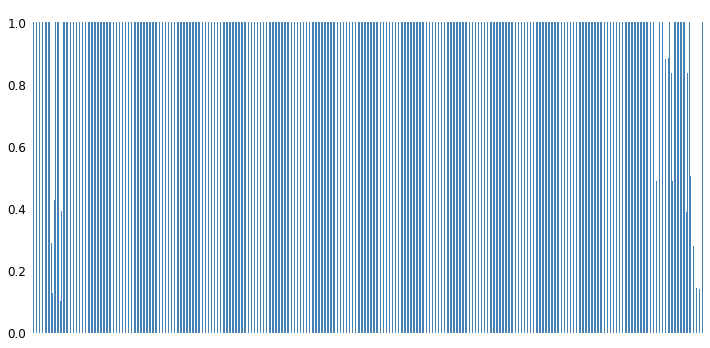

In [ ]:
# Hay casi un 3% de datos faltantes 
# para verlos, importamos la libreria missingno

import missingno as msno
msno.bar(dataset_renombrado,figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
#Traemos aquellas columnas en las cuales haya valores faltantes
missing_value_columns = dataset_renombrado.columns[dataset_renombrado.isnull().any()].tolist()
df_missing = dataset_renombrado[missing_value_columns]
df_missing.isnull().sum()

info_personal_insomnio_ultimo_anio                          6402
info_personal_fatiga_ultimo_anio                            8088
info_personal_cambiodeanimo_utlimo_anio                     6795
info_personal_irritabilidad_ultimo_anio                     7930
info_personal_tristeza_ultimo_anio                          8339
info_personal_llorar_ultimo_anio                            7969
info_personal_angustia_ultimo_anio                          7094
info_personal_ninguna_anterior_ultimo_anio                  5484
info_personal_no_corresponde                                9553
info_personal_tranquilizantes_ultimo_anio                   8142
info_personal_antidepresivos_ultimo_anio                    8578
info_personal_analgesicos_ultimo_anio                       4326
info_personal_ningun_medicamento_ultimo_anio                5816
info_personal_no_corresponde_ultimo_anio                    9562
VFS_P                                                       9378
VPFSM_P                  

In [ ]:
#Investigamos qué valores toma cada una de estas columnas, para decidir si es posible imputar o no
for column in df_missing.columns:
  print(column)
  print(df_missing[column].unique())

info_personal_insomnio_ultimo_anio
['Menciona' nan]
info_personal_fatiga_ultimo_anio
['Menciona' nan]
info_personal_cambiodeanimo_utlimo_anio
['Menciona' nan]
info_personal_irritabilidad_ultimo_anio
['Menciona' nan]
info_personal_tristeza_ultimo_anio
['Menciona' nan]
info_personal_llorar_ultimo_anio
['Menciona' nan]
info_personal_angustia_ultimo_anio
['Menciona' nan]
info_personal_ninguna_anterior_ultimo_anio
[nan 'Menciona']
info_personal_no_corresponde
[nan 'Menciona']
info_personal_tranquilizantes_ultimo_anio
[nan 'Menciona']
info_personal_antidepresivos_ultimo_anio
[nan 'Menciona']
info_personal_analgesicos_ultimo_anio
[nan 'Menciona']
info_personal_ningun_medicamento_ultimo_anio
['Menciona' nan]
info_personal_no_corresponde_ultimo_anio
[nan 'Menciona']
VFS_P
[nan 'Menciona']
VPFSM_P
[nan 'Menciona']
acoso_sexual_reiterado_relacion_agresor_pareja_actual_ex
['N.P.' nan 'Menciona']
sit_laboral_ultimo_trabajo_remunerado
['20' nan '36' '49' '46' '1' '9' '16' '5' '61' '6' '90' '40' '62'

Dentro de las columnas con nans identificamos 3 tipos:
1. Aquellas que no pueden imputarse y deben ser descartadas
2. Aquellas en las que la persona entrevistadora sólo rellenó los casos en que la mujer entrevistada "menciona" afirmativamente y el resto los completó con un string 'NaN'
3. Aquellas en que corresponde rellenar el NaN con "N.C." que es la categoría asignada a No Contesta

In [ ]:
#Dropeamos aquellas columnas con muchos nans que no pueden imputarse
dataset_renombrado.drop(columns=['ocupacion_persona_entrevistada', 
                                 'ocupacion_rama_persona_entrevistada',
                                 'ocupacion_persona_ingresos_principales',           
                                 'ocupacion_rama_persona_ingresos_principales',
                                 'sit_laboral_ultimo_trabajo_remunerado',
                                 'momento_finalizacion_ultimo_trabajo_remunerado',
                                 'VFS_P',
                                 'VPFSM_P',
                                 'info_gral_coordinador',
                                 'info_gral_codigo_estudio',
                                 'M1P2',
                                 'PESOCCAA'

                                 ], inplace=True)

In [ ]:
#Renombramos con N.C. aquellas preguntas que deben rellenarse con N.C.
dataset_renombrado[['ocupacion',
                    'ocupacion_rama',
                    'ocupacion_persona_ingresos_ppales',
                    'ocupacion_persona_ingresos_ppales_rama',
                    'nivel_de_estudios_entrevistada',
                    'SDE5A_2',
                    'relacion_laboral_entrevistada',
                    'SDE8A',
                    'relacion_persona_que_mas_aporta_hogar',
                    'sit_laboral_persona_que_mas_aporta_hogar',
                    'SDE9D']] = dataset_renombrado[['ocupacion',
                    'ocupacion_rama',
                    'ocupacion_persona_ingresos_ppales',
                    'ocupacion_persona_ingresos_ppales_rama',
                    'nivel_de_estudios_entrevistada',
                    'SDE5A_2',
                    'relacion_laboral_entrevistada',
                    'SDE8A',
                    'relacion_persona_que_mas_aporta_hogar',
                    'sit_laboral_persona_que_mas_aporta_hogar',
                    'SDE9D']].fillna('N.C.')


In [ ]:
#Renombramos con No aquellas preguntas que deben rellenarse con No

dataset_renombrado[['info_personal_insomnio_ultimo_anio',
                    'info_personal_fatiga_ultimo_anio',
                    'info_personal_cambiodeanimo_utlimo_anio',
                    'info_personal_irritabilidad_ultimo_anio',
                    'info_personal_tristeza_ultimo_anio',
                    'info_personal_llorar_ultimo_anio',
                    'info_personal_angustia_ultimo_anio',
                    'info_personal_ninguna_anterior_ultimo_anio',
                    'info_personal_no_corresponde',
                    'info_personal_tranquilizantes_ultimo_anio',
                    'info_personal_antidepresivos_ultimo_anio',
                    'info_personal_analgesicos_ultimo_anio',
                    'info_personal_ningun_medicamento_ultimo_anio',
                    'info_personal_no_corresponde_ultimo_anio',
                    'convive_pareja',
                    'convive_expareja',
                    'convive_madre_padre',
                    'convive_suegrx',
                    'convive_hijxs',
                    'convive_hijxs_pareja',
                    'convive_hermanxs',
                    'convive_abuelxs' ,
                    'convive_nietxs',
                    'convive_otros_parientes',
                    'convive_personas_no_emparentadas',
                    'convive_servicio_domestico',
                    'convive_familia_para_la_que_trabaja',
                    'convive_NC',
                    'entrevista_presencia_padre',
                    'entrevista_presencia_madre',                              
                    'entrevista_presencia_pareja_hombre',
                    'entrevista_presencia_pareja_mujer',
                    'entrevista_presencia_hijos',
                    'entrevista_presencia_hijas',
                    'entrevista_presencia_vecinos',
                    'entrevista_presencia_otros',
                    'entrevista_presencia_NC',
                    'acoso_sexual_reiterado_relacion_agresor_pareja_actual_ex']] = dataset_renombrado[['info_personal_insomnio_ultimo_anio',
                    'info_personal_fatiga_ultimo_anio',
                    'info_personal_cambiodeanimo_utlimo_anio',
                    'info_personal_irritabilidad_ultimo_anio',
                    'info_personal_tristeza_ultimo_anio',
                    'info_personal_llorar_ultimo_anio',
                    'info_personal_angustia_ultimo_anio',
                    'info_personal_ninguna_anterior_ultimo_anio',
                    'info_personal_no_corresponde',
                    'info_personal_tranquilizantes_ultimo_anio',
                    'info_personal_antidepresivos_ultimo_anio',
                    'info_personal_analgesicos_ultimo_anio',
                    'info_personal_ningun_medicamento_ultimo_anio',
                    'info_personal_no_corresponde_ultimo_anio',
                    'convive_pareja',
                    'convive_expareja',
                    'convive_madre_padre',
                    'convive_suegrx',
                    'convive_hijxs',
                    'convive_hijxs_pareja',
                    'convive_hermanxs',
                    'convive_abuelxs' ,
                    'convive_nietxs',
                    'convive_otros_parientes',
                    'convive_personas_no_emparentadas',
                    'convive_servicio_domestico',
                    'convive_familia_para_la_que_trabaja',
                    'convive_NC',
                    'entrevista_presencia_padre',
                    'entrevista_presencia_madre',                              
                    'entrevista_presencia_pareja_hombre',
                    'entrevista_presencia_pareja_mujer',
                    'entrevista_presencia_hijos',
                    'entrevista_presencia_hijas',
                    'entrevista_presencia_vecinos',
                    'entrevista_presencia_otros',
                    'entrevista_presencia_NC',
                    'acoso_sexual_reiterado_relacion_agresor_pareja_actual_ex']].fillna('No')
   

In [ ]:
# Verificamos si existen datos repetidos en las filas
# Vamos a chequear si existen filas duplicadas en nuestro data frame fijandonos en la columna "nro de encuesta"
df = dataset_renombrado
df.drop_duplicates('info_gral_nro_encuesta', inplace=True)

La cantidad de filas es la misma lugo de aplicar drop_duplicates que en nuestro data frame origina, por lo que no existen datos duplicados. En este caso, un dato duplicado se corresponderia a personas encuestadas cargadas en el archivo mas de una vez.

In [ ]:
# Confirmamos que no haya mas datos faltantes
missing_value_counts = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_value_counts.sum()
(total_missing/total_cells) * 100

0.0

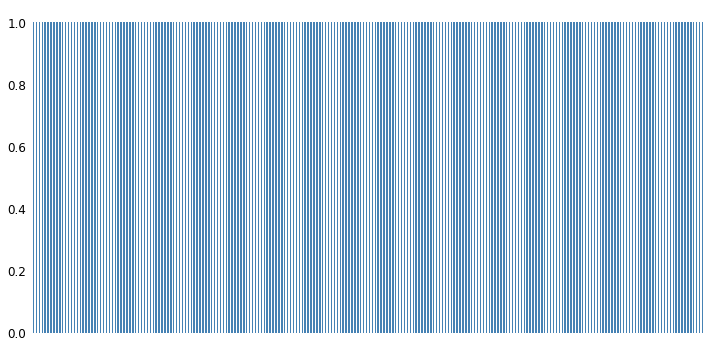

In [ ]:
#Lo visualizamos
import missingno as msno
msno.bar(df,figsize=(12, 6), fontsize=12, color='steelblue')

In [ ]:
# Ejemplo de cómo utilizar la función "dataset_especifico" para filtrar por tipo de violencia
dataset_vsexual = functions.dataset_especifico(dataset_renombrado, 'vsexual')
dataset_vsexual.sample()

,vsexual_pareja_actual_sexo_amenazada,vsexual_pareja_actual_sexo_drogada,vsexual_pareja_actual_sexo_miedo,vsexual_pareja_actual_sexo_obligada,vsexual_pareja_actual_sexo_intento,vsexual_pareja_actual_sexo_tocarte,vsexual_pareja_actual_sexo_tocarle,vsexual_pareja_actual_sexo_otra_practica_sexual,vsexual_pareja_actual_ultimo_anio_sexo_amenazada,vsexual_pareja_actual_ultimo_anio_sexo_drogada,vsexual_pareja_actual_ultimo_anio_sexo_miedo,vsexual_pareja_actual_ultimo_anio_sexo_obligada,vsexual_pareja_actual_ultimo_anio_sexo_intento,vsexual_pareja_actual_ultimo_anio_sexo_tocarte,vsexual_pareja_actual_ultimo_anio_sexo_tocarle,vsexual_pareja_actual_ultimo_anio_sexo_otra_practica_sexual,vsexual_pareja_actual_4_anios_sexo_amenazada,vsexual_pareja_actual_4_anios_sexo_drogada,vsexual_pareja_actual_4_anios_sexo_miedo,vsexual_pareja_actual_4_anios_sexo_obligada,vsexual_pareja_actual_4_anios_sexo_intento,vsexual_pareja_actual_4_anios_sexo_tocarte,vsexual_pareja_actual_4_anios_sexo_tocarle,vsexual_pareja_actual_4_anios_sexo_otra_practica_sexual,vsexual_pareja_actual_reiterada,vsexual_pareja_actual_frecuencia,vsexual_vfisica_pareja_actual_dolencias_externas,vsexual_vfisica_pareja_actual_dolencias_internas,vsexual_vfisica_pareja_actual_heridas_profundas,vsexual_vfisica_pareja_actual_aborto,vsexual_vfisica_pareja_actual_lesiongenital,vsexual_vfisica_pareja_actual_ETS,vsexual_vfisica_pareja_actual_danio_permanente,vsexual_vfisica_pareja_actual_otros_danios,vsexual_vfisica_pareja_actual_ninguna,vsexual_vfisica_pareja_actual_no_corresponde,vsexual_vfisica_pareja_actual_ultimo_anio_dolencias_externas,vsexual_vfisica_pareja_actual_ultimo_anio_dolencias_internas,vsexual_vfisica_pareja_actual_ultimo_anio_heridas_profundas,vsexual_vfisica_pareja_actual_ultimo_anio_aborto,vsexual_vfisica_pareja_actual_ultimo_anio_lesiongenital,vsexual_vfisica_pareja_actual_ultimo_anio_ETS,vsexual_vfisica_pareja_actual_ultimo_anio_danio_permanente,vsexual_vfisica_pareja_actual_ultimo_anio_otros_danios,vsexual_vfisica_pareja_actual_4_anios_dolencias_externas,vsexual_vfisica_pareja_actual_4_anios_dolencias_internas,vsexual_vfisica_pareja_actual_4_anios_heridas_profundas,vsexual_vfisica_pareja_actual_4_anios_aborto,vsexual_vfisica_pareja_actual_4_anios_lesiongenital,vsexual_vfisica_pareja_actual_4_anios_ETS,vsexual_vfisica_pareja_actual_4_anios_danio_permanente,vsexual_vfisica_pareja_actual_4_anios_otros_danios,vsexual_vfisica_pareja_actual_acceso_sanitario,vsexual_vfisica_pareja_actual_depresion,vsexual_vfisica_pareja_actual_baja_autoestima,vsexual_vfisica_pareja_actual_ansidad_fobia_panico,vsexual_vfisica_pareja_actual_impotencia,vsexual_vfisica_pareja_actual_concentracion_memoria,vsexual_vfisica_pareja_actual_suenio_alimentacion,vsexual_vfisica_pareja_actual_dolor_corporal,vsexual_vfisica_pareja_actual_autolesion_suicidio,vsexual_vfisica_pareja_actual_ninguno,vsexual_vfisica_pareja_actual_no_corresponde,vsexual_vfisica_pareja_actual_discapacidad,vsexual_vfisica_pareja_actual_ausentismos,vsexual_vfisica_pareja_actual_consumo_medicamentos,vsexual_vfisica_pareja_actual_consumo_alcohol,vsexual_vfisica_pareja_actual_consumo_drogas,vsexual_vfisica_pareja_actual_no_consumo,vsexual_vfisica_pareja_actual_no_corresponde,vsexual_vfisica_pareja_actual_hijos_presentes,vsexual_vfisica_pareja_actual_hijos_heridos,vsexual_vfisica_pareja_actual_hijos_menores_heridos,vsexual_vfisica_pareja_actual_conocim_policia,vsexual_vfisica_pareja_actua_grado_satisf_resp_policia,...,vsexual_fuera_pareja_no_informa_policia_miedo,vsexual_fuera_pareja_no_informa_policia_verguenza,vsexual_fuera_pareja_no_informa_policia_culpa_propia,vsexual_fuera_pareja_no_informa_policia_miedo_que_no_crean,vsexual_fuera_pareja_no_informa_policia_desconocimiento,vsexual_fuera_pareja_no_informa_policia_convencer_no_denunciar,vsexual_fuera_pareja_no_informa_policia_fin_problema,vsexual_fuera_pareja_no_informa_policia_sin_recursos,vsexual_fuera_pareja_no_informa_policia_otra_ayuda,vsexual_fuera_pareja_no_informa_policia_menor_d

In [ ]:
#Funcion que trae el dataset de informacion personal de la entrevistada
df_info_personal = functions.recuperar_info_personal(dataset_renombrado)
df_info_personal.sample()

,info_personal_sit_laboral_actual,info_personal_frec_reuniones_familiares,info_personal_persona_confianza,info_personal_persona_acoger,info_personal_tiene_hijes,info_personal_tiene_hijes_menores,info_personal_nro_hijes_menores,info_personal_nro_hijes_menores_convive,info_personal_otros_menores_convive,info_personal_nro_menores_convive,info_personal_estado_salud_ultimo_anio,info_personal_insomnio_ultimo_anio,info_personal_fatiga_ultimo_anio,info_personal_cambiodeanimo_utlimo_anio,info_personal_irritabilidad_ultimo_anio,info_personal_tristeza_ultimo_anio,info_personal_llorar_ultimo_anio,info_personal_angustia_ultimo_anio,info_personal_ninguna_anterior_ultimo_anio,info_personal_no_corresponde,info_personal_discapacidad,info_personal_limitaciones_por_mas_de_un_anio,info_personal_un_dia_en_cama_ultimo_anio,info_personal_visita_medico_ultimo_anio,info_personal_internada_ultimo_anio,info_personal_servicio_urgencia_ultimo_anio,info_personal_psicologo_psiquiatra_ultimo_anio,info_personal_tranquilizantes_ultimo_anio,info_personal_antidepresivos_ultimo_anio,info_personal_analgesicos_ultimo_anio,info_personal_ningun_medicamento_ultimo_anio,info_personal_no_corresponde_ultimo_anio,info_personal_pensamientos_suicidas,info_personal_pensamientos_suicidas_ultimo_anio,info_personal_intento_suicidio,info_personal_intento_suicidio_ultimo_anio,info_personal_nro_parejas,info_personal_sexo_parejas,info_personal_tiene_pareja,info_personal_convive_con_pareja,info_personal_sit_legal_con_pareja,info_personal_tiempo_con_pareja_actual,acoso_sexual_reiterado_publicacion_info_personal_victima
8960,Estudiante,Todos o casi todos los días,Sí,Sí,No,N.P.,N.P.,N.P.,No,N.P.,Muy bueno,No,No,No,No,No,No,No,Menciona,No,No,No,No,No,No,No,No,No,No,No,Menciona,No,No,N.P.,N.P.,N.P.,2 parejas,Solo hombres,No,N.P.,N.P.,N.P.,No


In [ ]:
#Join de ambos datasets para tener el panorama completo sobre info personal y violencia específica
dataset_vsexual_info_personal = pd.concat([df_info_personal, dataset_vsexual], axis=1)
dataset_vsexual_info_personal.sample()

,info_personal_sit_laboral_actual,info_personal_frec_reuniones_familiares,info_personal_persona_confianza,info_personal_persona_acoger,info_personal_tiene_hijes,info_personal_tiene_hijes_menores,info_personal_nro_hijes_menores,info_personal_nro_hijes_menores_convive,info_personal_otros_menores_convive,info_personal_nro_menores_convive,info_personal_estado_salud_ultimo_anio,info_personal_insomnio_ultimo_anio,info_personal_fatiga_ultimo_anio,info_personal_cambiodeanimo_utlimo_anio,info_personal_irritabilidad_ultimo_anio,info_personal_tristeza_ultimo_anio,info_personal_llorar_ultimo_anio,info_personal_angustia_ultimo_anio,info_personal_ninguna_anterior_ultimo_anio,info_personal_no_corresponde,info_personal_discapacidad,info_personal_limitaciones_por_mas_de_un_anio,info_personal_un_dia_en_cama_ultimo_anio,info_personal_visita_medico_ultimo_anio,info_personal_internada_ultimo_anio,info_personal_servicio_urgencia_ultimo_anio,info_personal_psicologo_psiquiatra_ultimo_anio,info_personal_tranquilizantes_ultimo_anio,info_personal_antidepresivos_ultimo_anio,info_personal_analgesicos_ultimo_anio,info_personal_ningun_medicamento_ultimo_anio,info_personal_no_corresponde_ultimo_anio,info_personal_pensamientos_suicidas,info_personal_pensamientos_suicidas_ultimo_anio,info_personal_intento_suicidio,info_personal_intento_suicidio_ultimo_anio,info_personal_nro_parejas,info_personal_sexo_parejas,info_personal_tiene_pareja,info_personal_convive_con_pareja,info_personal_sit_legal_con_pareja,info_personal_tiempo_con_pareja_actual,acoso_sexual_reiterado_publicacion_info_personal_victima,vsexual_pareja_actual_sexo_amenazada,vsexual_pareja_actual_sexo_drogada,vsexual_pareja_actual_sexo_miedo,vsexual_pareja_actual_sexo_obligada,vsexual_pareja_actual_sexo_intento,vsexual_pareja_actual_sexo_tocarte,vsexual_pareja_actual_sexo_tocarle,vsexual_pareja_actual_sexo_otra_practica_sexual,vsexual_pareja_actual_ultimo_anio_sexo_amenazada,vsexual_pareja_actual_ultimo_anio_sexo_drogada,vsexual_pareja_actual_ultimo_anio_sexo_miedo,vsexual_pareja_actual_ultimo_anio_sexo_obligada,vsexual_pareja_actual_ultimo_anio_sexo_intento,vsexual_pareja_actual_ultimo_anio_sexo_tocarte,vsexual_pareja_actual_ultimo_anio_sexo_tocarle,vsexual_pareja_actual_ultimo_anio_sexo_otra_practica_sexual,vsexual_pareja_actual_4_anios_sexo_amenazada,vsexual_pareja_actual_4_anios_sexo_drogada,vsexual_pareja_actual_4_anios_sexo_miedo,vsexual_pareja_actual_4_anios_sexo_obligada,vsexual_pareja_actual_4_anios_sexo_intento,vsexual_pareja_actual_4_anios_sexo_tocarte,vsexual_pareja_actual_4_anios_sexo_tocarle,vsexual_pareja_actual_4_anios_sexo_otra_practica_sexual,vsexual_pareja_actual_reiterada,vsexual_pareja_actual_frecuencia,vsexual_vfisica_pareja_actual_dolencias_externas,vsexual_vfisica_pareja_actual_dolencias_internas,vsexual_vfisica_pareja_actual_heridas_profundas,vsexual_vfisica_pareja_actual_aborto,vsexual_vfisica_pareja_actual_lesiongenital,vsexual_vfisica_pareja_actual_ETS,...,vsexual_fuera_pareja_no_informa_policia_miedo,vsexual_fuera_pareja_no_informa_policia_verguenza,vsexual_fuera_pareja_no_informa_policia_culpa_propia,vsexual_fuera_pareja_no_informa_policia_miedo_que_no_crean,vsexual_fuera_pareja_no_informa_policia_desconocimiento,vsexual_fuera_pareja_no_informa_policia_convencer_no_denunciar,vsexual_fuera_pareja_no_informa_policia_fin_problema,vsexual_fuera_pareja_no_informa_policia_sin_recursos,vsexual_fuera_pareja_no_informa_policia_otra_ayuda,vsexual_fuera_pareja_no_informa_policia_menor_de_edad,vsexual_fuera_pareja_no_informa_policia_otros_tiempos,vsexual_fuera_pareja_no_informa_policia_otro_pais,vsexual_fuera_pareja_no_informa_policia_otros_motivos,vsexual_fuera_pareja_no_informa_policia_NC,vsexual_fuera_pareja_psicologx,vsexual_fuera_pareja_medicx,vsexual_fuera_pareja_farmacia,vsexual_fuera_pareja_servicios_sociales,vsexual_fuera_pareja_ONG,vsexual_fuera_pareja_iglesia,vsexual_fuera_pareja_abogadx,vsexual_fuera_pareja_otros,vsexual_fuera_pareja_satisfaccion_psicologx,vsexual_fuera_par

In [ ]:
#Para realizar el encoding, vamos a seleccionar aquellas variables numéricas que no es necesario encodear
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = dataset_renombrado.select_dtypes(include=numerics)
num_df.columns


Index(['info_gral_nro_registro', 'info_gral_nro_encuesta',
       'info_gral_duracion_encuesta', 'peso_persona_entrevistada',
       'edad_persona_entrevistada', 'PESOCCAA'],
      dtype='object')

In [ ]:
categorical_cols = dataset_renombrado.drop(columns=[ 
                                                    'info_gral_nro_registro',
                                                    'info_gral_nro_encuesta',
                                                    'info_gral_duracion_encuesta',
                                                    'peso_persona_entrevistada', 
                                                    'edad_persona_entrevistada',
                                                    'info_gral_fecha_inicio',
                                                    'info_gral_hora_inicio',
                                                    'nfo_gral_fecha_fin',
                                                    'info_gral_hora_fin',
                                                    ])
categorical_cols.head()

,info_gral_comunidad_autonoma,info_gral_provincia,info_gral_municipio,info_gral_distrito,info_gral_seccion,info_gral_capital,info_gral_tamanio_municipio,info_gral_nro_entevistador,info_personal_sit_laboral_actual,info_personal_frec_reuniones_familiares,info_personal_persona_confianza,info_personal_persona_acoger,info_personal_tiene_hijes,info_personal_tiene_hijes_menores,info_personal_nro_hijes_menores,info_personal_nro_hijes_menores_convive,info_personal_otros_menores_convive,info_personal_nro_menores_convive,info_personal_estado_salud_ultimo_anio,info_personal_insomnio_ultimo_anio,info_personal_fatiga_ultimo_anio,info_personal_cambiodeanimo_utlimo_anio,info_personal_irritabilidad_ultimo_anio,info_personal_tristeza_ultimo_anio,info_personal_llorar_ultimo_anio,info_personal_angustia_ultimo_anio,info_personal_ninguna_anterior_ultimo_anio,info_personal_no_corresponde,info_personal_discapacidad,info_personal_limitaciones_por_mas_de_un_anio,info_personal_un_dia_en_cama_ultimo_anio,info_personal_visita_medico_ultimo_anio,info_personal_internada_ultimo_anio,info_personal_servicio_urgencia_ultimo_anio,info_personal_psicologo_psiquiatra_ultimo_anio,info_personal_tranquilizantes_ultimo_anio,info_personal_antidepresivos_ultimo_anio,info_personal_analgesicos_ultimo_anio,info_personal_ningun_medicamento_ultimo_anio,info_personal_no_corresponde_ultimo_anio,info_personal_pensamientos_suicidas,info_personal_pensamientos_suicidas_ultimo_anio,info_personal_intento_suicidio,info_personal_intento_suicidio_ultimo_anio,info_personal_nro_parejas,info_personal_sexo_parejas,info_personal_tiene_pareja,info_personal_convive_con_pareja,info_personal_sit_legal_con_pareja,info_personal_tiempo_con_pareja_actual,vpsico_pareja_actual_no_ver_amigos,vpsico_pareja_actual_no_ver_familia,vpsico_pareja_actual_donde_estoy,vpsico_pareja_actual_me_ignora,vpsico_pareja_actual_hablar_con_otros,vpsico_pareja_actual_sospecha_infidelidad,vpsico_pareja_actual_pedir_permiso,vpsico_pareja_actual_no_da_dinero,vpsico_pareja_actual_decisiones_hogar,vpsico_pareja_actual_trabajar_estudiar,vpsico_pareja_actual_usa_tu_dinero,vpsico_pareja_acutal_ultimo_anio_no_ver_amigos,vpsico_pareja_actual_ultimo_anio_no_ver_familia,vpsico_pareja_actual_ultimo_anio_donde_estoy,vpsico_pareja_actual_ultimo_anio_me_ignora,vpsico_pareja_actual_ultimo_anio_hablar_con_otros,vpsico_pareja_actual_ultimo_anio_sospecha_infidelidad,vpsico_pareja_actual_ultimo_anio_pedir_permiso,vpsico_pareja_actual_ultimo_anio_no_da_dinero,vpsico_pareja_actual_ultimo_anio_decisiones_hogar,vpsico_pareja_actual_ultimo_anio_trabajar_estudiar,vpsico_pareja_actual_ultimo_anio_usa_tu_dinero,vpsico_pareja_acutal_4_anios_no_ver_amigos,vpsico_pareja_actual_4_anios_no_ver_familia,vpsico_pareja_actual_4_anios_donde_estoy,...,acoso_sexual_reiterado_informo_familiar,acoso_sexual_reiterado_informo_amigx,acoso_sexual_reiterado_informo_colega,sit_laboral_trabajo_remunerado_en_vida,ocupacion,ocupacion_rama,ocupacion_persona_ingresos_ppales,ocupacion_persona_ingresos_ppales_rama,religiosidad,uso_internet,escala_simpatia_feminismo,telefono,entrevista_lugar,entrevista_quiso_abandonar,entrevista_se_sintio_incomoda,entrevista_prisa_por_terminar,entrevista_ninguna_anteriores,entrevista_presencia_terceros,entrevista_presencia_padre,entrevista_presencia_madre,entrevista_presencia_pareja_hombre,entrevista_presencia_pareja_mujer,entrevista_presencia_hijos,entrevista_presencia_hijas,entrevista_presencia_vecinos,entrevista_presencia_otros,entrevista_presencia_NC,entrevista_uso_tarjetas,entrevista_oculto_violencia,nivel_estudios_pareja_actual,nivel_estudios_persona_entrevistada,sit_laboral_ocupada_no_ocupada,acoso_sexual_reiterado_informo_compañerx_estudios,acoso_sexual_reiterado_informo_linea_ayuda,acoso_sexual_reiterado_informo_redes_sociales,acoso_sexual_reiterado_informo_otra_persona,acoso_sexual_reiterado_informo_otra_institucion,acoso_sexual_reiterado_informo_no_informo,acoso_sexual_reiterado_informo_NC,acoso_sexual_reiterado_consumo_medicamentos,

In [ ]:
#OneHotEncoding de todas las variables del dataset renombrado
df_encoded = pd.get_dummies(dataset_renombrado, columns=categorical_cols.columns) #o cualquier subset de datos que querramos encodear
df_encoded.head()

,info_gral_nro_registro,info_gral_nro_encuesta,info_gral_fecha_inicio,info_gral_hora_inicio,nfo_gral_fecha_fin,info_gral_hora_fin,info_gral_duracion_encuesta,peso_persona_entrevistada,edad_persona_entrevistada,PESOCCAA,info_gral_comunidad_autonoma_Andalucía,info_gral_comunidad_autonoma_Aragón,info_gral_comunidad_autonoma_Asturias (Principado de),info_gral_comunidad_autonoma_Balears (Illes),info_gral_comunidad_autonoma_Canarias,info_gral_comunidad_autonoma_Cantabria,info_gral_comunidad_autonoma_Castilla y León,info_gral_comunidad_autonoma_Castilla-La Mancha,info_gral_comunidad_autonoma_Cataluña,info_gral_comunidad_autonoma_Ceuta (Ciudad Autónoma de),info_gral_comunidad_autonoma_Comunitat Valenciana,info_gral_comunidad_autonoma_Extremadura,info_gral_comunidad_autonoma_Galicia,info_gral_comunidad_autonoma_Madrid (Comunidad de),info_gral_comunidad_autonoma_Melilla (Ciudad Autónoma de),info_gral_comunidad_autonoma_Murcia (Región de),info_gral_comunidad_autonoma_Navarra (Comunidad Foral de),info_gral_comunidad_autonoma_País Vasco,info_gral_comunidad_autonoma_Rioja (La),info_gral_provincia_Albacete,info_gral_provincia_Alicante/Alacant,info_gral_provincia_Almería,info_gral_provincia_Araba/Álava,info_gral_provincia_Asturias,info_gral_provincia_Badajoz,info_gral_provincia_Balears (Illes),info_gral_provincia_Barcelona,info_gral_provincia_Bizkaia,info_gral_provincia_Burgos,info_gral_provincia_Cantabria,info_gral_provincia_Castellón/Castelló,info_gral_provincia_Ceuta,info_gral_provincia_Ciudad Real,info_gral_provincia_Coruña (A),info_gral_provincia_Cuenca,info_gral_provincia_Cáceres,info_gral_provincia_Cádiz,info_gral_provincia_Córdoba,info_gral_provincia_Gipuzkoa,info_gral_provincia_Girona,info_gral_provincia_Granada,info_gral_provincia_Guadalajara,info_gral_provincia_Huelva,info_gral_provincia_Huesca,info_gral_provincia_Jaén,info_gral_provincia_León,info_gral_provincia_Lleida,info_gral_provincia_Lugo,info_gral_provincia_Madrid,info_gral_provincia_Melilla,info_gral_provincia_Murcia,info_gral_provincia_Málaga,info_gral_provincia_Navarra,info_gral_provincia_Ourense,info_gral_provincia_Palencia,info_gral_provincia_Palmas (Las),info_gral_provincia_Pontevedra,info_gral_provincia_Rioja (La),info_gral_provincia_Salamanca,info_gral_provincia_Santa Cruz de Tenerife,info_gral_provincia_Segovia,info_gral_provincia_Sevilla,info_gral_provincia_Soria,info_gral_provincia_Tarragona,info_gral_provincia_Teruel,...,SDE9D_Miembro de una cooperativa,SDE9D_N.C.,SDE9D_Otra situación,SDE9D_Profesional o trabajador/a autónomo/a (sin asalariados/as),"tamano_hogar_1 persona, vive sola",tamano_hogar_10,tamano_hogar_11,tamano_hogar_2 personas,tamano_hogar_3 personas,tamano_hogar_4,tamano_hogar_5,tamano_hogar_6,tamano_hogar_7,tamano_hogar_8,tamano_hogar_9,tamano_hogar_N.C.,convive_pareja_Menciona,convive_pareja_N.P.,convive_pareja_No,convive_expareja_Menciona,convive_expareja_N.P.,convive_expareja_No,convive_madre_padre_Menciona,convive_madre_padre_N.P.,convive_madre_padre_No,convive_suegrx_Menciona,convive_suegrx_N.P.,convive_suegrx_No,convive_hijxs_Menciona,convive_hijxs_N.P.,convive_hijxs_No,convive_hijxs_pareja_Menciona,convive_hijxs_pareja_N.P.,convive_hijxs_pareja_No,convive_hermanxs_Menciona,convive_hermanxs_N.P.,convive_hermanxs_No,convive_abuelxs_Menciona,convive_abuelxs_N.P.,convive_abuelxs_No,convive_nietxs_Menciona,convive_nietxs_N.P.,convive_nietxs_No,convive_otros_parientes_Menciona,convive_otros_parientes_N.P.,convive_otros_parientes_No,convive_personas_no_emparentadas_Menciona,convive_personas_no_emparentadas_N.P.,convive_personas_no_emparentadas_No,convive_servicio_domestico_Menciona,convive_servicio_domestico_N.P.,convive_servicio_domestico_No,convive_familia_para_la_que_trabaja_Menciona,convive_familia_para_la_que_trabaja_N.P.,convive_familia_para_la_que_trabaja_No,convive_NC_Menciona,convive_NC_N.P.,convive_NC_No,ingresos_hogar_(NO LEER) N.C.,ingresos_hogar_(NO LEER) N.S.,ingresos_hogar_De 1.201 a 1.800 &euro;,ingresos_hogar_De 1.801 a 2.400 &euro;